# Смыслов Максим ИУ5-65Б Вар15

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
data = pd.read_csv('data.csv')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [10]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data = data[data['inspection_score'].isna() ==False]

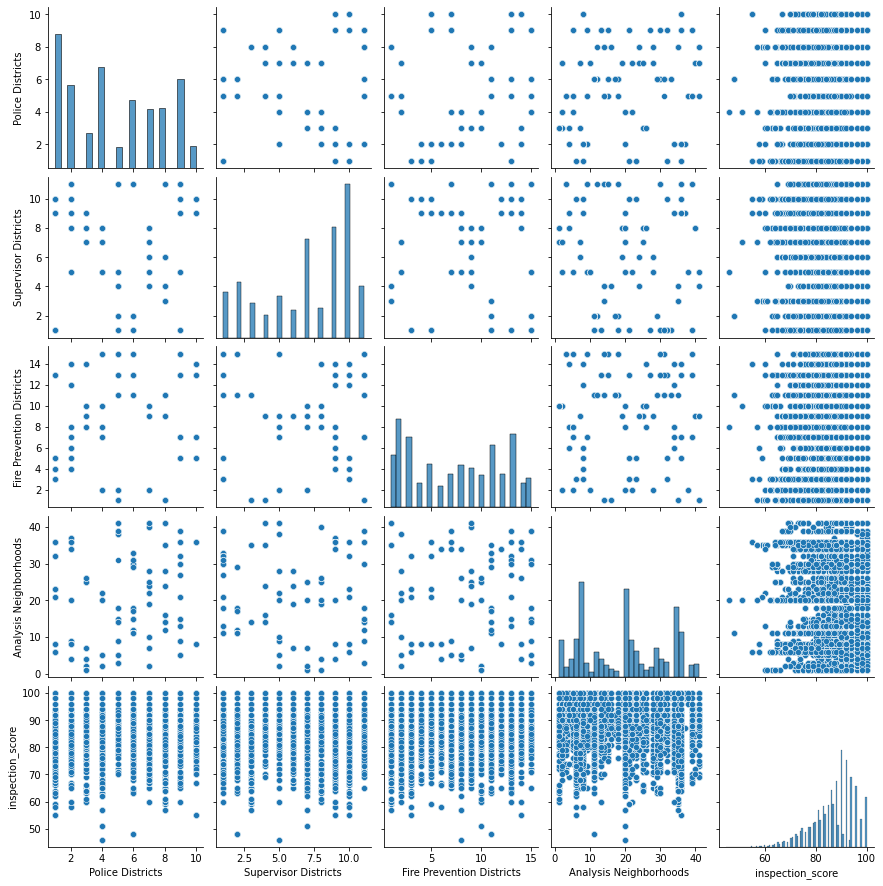

In [49]:
sns.pairplot(data[['Police Districts','Supervisor Districts','Fire Prevention Districts','Analysis Neighborhoods','inspection_score']])

In [55]:
data['Analysis Neighborhoods'] = data['Analysis Neighborhoods'].fillna(data['Analysis Neighborhoods'].mean())

Использовал просто заполнением по средней

In [56]:
data['risk_category'] = data['risk_category'].fillna(data['risk_category'].mode())

С категориальным признаком решил использовать моду

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40363 entries, 1 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                40363 non-null  int64  
 1   business_name              40363 non-null  object 
 2   business_address           40363 non-null  object 
 3   business_city              40363 non-null  object 
 4   business_state             40363 non-null  object 
 5   business_postal_code       39645 non-null  object 
 6   business_latitude          27139 non-null  float64
 7   business_longitude         27139 non-null  float64
 8   business_location          27139 non-null  object 
 9   business_phone_number      12380 non-null  float64
 10  inspection_id              40363 non-null  object 
 11  inspection_date            40363 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            40363 non-null  obj

В целом, если прогнозировать метрику inspection_score я бы анализировал координаты. Для начала хорошо бы всё это посмотреть на карте. По количественным признакам не видно корреляцию, поэтому трудно сразу сказать, что использовать в модели. Если честно, датасет не совсем подходящий для использования в модели, т.к. очень много информации бесполезной вроде Zip Codes или  business_postal_code и т.д. А интересных признаков не нашёл, кроме координат